## Вопрос 1

Выберите ВСЕ типы данных, которые можно перебрать циклом for


In [ ]:
# итерируемые (перебираемые) - строки + все контейнеры (списки, кортежи, множества, словари)
# нельзя: числа, вещественные числа, логические переменные

# проверяется так:
for i in 5.245:
  print(i)

TypeError: 'float' object is not iterable

## Вопрос 2

Списки отличаются от кортежей тем, что...

Список можно изменить. Все остальное можно проделать и с кортежем

## Вопрос 3

Контейнеры бывают упорядоченными и неупорядоченными. Выберите только такой контейнер, на основе которого создавать таблицу в pandas неудобно - значения перемешаются в случайном порядке

Перемешиваются - значит множество, остальные либо хранят порядок (списки, кортежи), либо условно хранят его (при добавлении в словарь элементы НЕ перемешиваются)

## Вопрос 4

Вам и вашим коллегам подарили несколько книг в офис: 2 экземпляра книги "Introduction to Python for Humanists" и 1 экземпляр "Humanities Data Analysis: Case Studies with Python".

Выберите ВСЕ контейнеры, которые позволят сохранить информацию о названиях книг и их количестве без потерь

In [ ]:
# идеально - словарь:
books = {
    "Introduction to Python for Humanists" : 2,
    "Humanities Data Analysis: Case Studies with Python" : 1
}

In [ ]:
# хуже, но возможно:

books = ["Introduction to Python for Humanists", "Introduction to Python for Humanists", "Humanities Data Analysis: Case Studies with Python"]

books = ("Introduction to Python for Humanists", "Introduction to Python for Humanists", "Humanities Data Analysis: Case Studies with Python")

# дубликаты не исчезнут, всегда можно с помощью .count() узнать количество книг

# можно также:
books = [["Introduction to Python for Humanists", 2],
         ["Humanities Data Analysis: Case Studies with Python", 1]]


In [ ]:
# нельзя в виде множества: перемешаются, дубликаты удалятся

## Вопрос 5

У вас вот такой маленький корпус:


In [ ]:
# для очистки (препроцессинга) текста...
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

# spaCy лемматизация английского
import spacy
nlp = spacy.load("en_core_web_sm")

from collections import Counter

Данный сниппет кода выполняет задачу препроцессинга (очистки) текста. Он состоит из нескольких шагов, которые я разберу:

1. **Импорт нужных библиотек и их компонентов**
   Используются две библиотеки: NLTK (Natural Language Toolkit) и spaCy. Они предоставляют инструменты для работы с естественным языком.
   
   ```python
   import nltk
   from nltk.tokenize import sent_tokenize, word_tokenize
   from nltk.corpus import stopwords
   import spacy
   ```
   
2. **Загрузка модели токенизации NLTK**
   Здесь загружается модель для токенизации ("punkt") из NLTK. Токенизация – это процесс разбиения текста на части, которые могут быть словами, предложениями и т. д.
   ```python
   nltk.download('punkt')
   ```

3. **Загрузка стоп-слов**
   Стоп-слова это слова, которые часто встречаются в тексте, но не несут какой-либо значимой информации (например, "а", "и", "в" и т.д.). Здесь загружается список стоп-слов на английском.
   ```python
   nltk.download('stopwords')
   stop_words = stopwords.words('english')
   ```

4. **Загрузка модели для лемматизации из SpaCy**
   Лемматизация – это процесс приведения слов к их нормальной форме (например, "running" -> "run"). В коде используется модель "en_core_web_sm" для английского языка.
   ```python
   nlp = spacy.load("en_core_web_sm")
   ```

5. **Импорт модуля Counter из collections**
   Counter предоставляет функцию подсчёта элементов в списке.
   ```python
   from collections import Counter
   ```

В общем, код готовит некоторые инструменты и ресурсы, которые в дальнейшем нужны при препроцессинге текста.

In [ ]:
def get_en_lemm(text):
  text = text.lower()
  text_tokens = word_tokenize(text)
  clean_tokens = [] # чистим список токенов
  for i in text_tokens:
    if i[0].isalpha() and i not in stop_words:
      clean_tokens.append(i)
  spacy_token = []
  doc = nlp(' '.join(clean_tokens))
  for token in doc:
    if token.lemma_ != '-' and token.lemma_ != '.':
        spacy_token.append(token.lemma_)
  return spacy_token

Данный Python-код создает функцию, которая принимает в качестве входного параметра текст на английском языке и занимается его так называемой лемматизацией. Позвольте объяснить подробнее каждый шаг этого кода:

1. **def get_en_lemm(text):** это определение новой функции с именем `get_en_lemm`, которая принимает один аргумент - `text`, текст, который нужно лемматизировать.

2. **text = text.lower():** этот оператор приводит все символы входного текста к нижнему регистру.

3. **text_tokens = word_tokenize(text):** это шаг преобразования входного текста в список токенов (т.е. отдельных слов). Для этого используется функция `word_tokenize` из библиотеки nltk.

4. **clean_tokens = []:** здесь создается пустой список, который впоследствии будет заполнен полученными токенами.

5. Далее идет цикл **for i in text_tokens:**. В нем для каждого элемента списка `text_tokens` производятся следующие действия:

  - **if i[0].isalpha() and i not in stop_words:** проверяется, является ли первый символ токена буквой и не входит ли слово в список стоп-слов (`stop_words`). Стоп-слова - это обычно часто используемые слова, такие как "and", "the", "a", которые обычно игнорируются при анализе текста.

  - **clean_tokens.append(i):** если условия выполняются, слово добавляется в список `clean_tokens`.

6. **spacy_token = []:** создается еще один пустой список, который будет заполнен лемматизированными формами слов.

7. **doc = nlp(' '.join(clean_tokens)):** здесь текст в формате списка `clean_tokens` приводится обратно к строковому формату и обрабатывается с помощью функции `nlp` из библиотеки Spacy.

8. И последний цикл **for token in doc:**. Задача этого цикла - пройтись по всем элементам `doc` и применить к ним лемматизацию:

  - **if token.lemma_ != '-' and token.lemma_ != '.':** данный код исключает попадания в список лемм знаков препинания.

  - **spacy_token.append(token.lemma_):** если условия выполняются, то лемма текущего токена добавляется в список `spacy_token`.

9. **return spacy_token:** возвращает список, содержащий леммы всех слов во входном тексте.

Коротко говоря, данный код представляет собой функцию, которая принимает на вход текст, очищает его от стоп-слов и знаков препинания, приводит слова к их лемме (базовой форме), и возвращает список этих лемматизированных слов. Используя лемматизацию, можно сократить объем данных, не потеряв при этом смыслового содержания.

In [ ]:
text = '''Soft kitty, warm kitty,
Little ball of fur
Happy kitty, sleepy kitty,
Purr, purr, purr'''

In [ ]:
print(get_en_lemm(text))

['soft', 'kitty', 'warm', 'kitty', 'little', 'ball', 'fur', 'happy', 'kitty', 'sleepy', 'kitty', 'purr', 'purr', 'purr']


## Вопрос 6

Для корпуса из задачи выше посчитайте самые частотные биграммы.

В качестве ответа укажите биграмму, которая встречалась чаще всего.

Пример ответа:

(('котенок', 'спать'), 1)


In [ ]:
lemm = get_en_lemm(text)
bigrams = Counter(nltk.bigrams(lemm))
print(bigrams)
print(*bigrams.most_common(1))

Counter({('purr', 'purr'): 2, ('soft', 'kitty'): 1, ('kitty', 'warm'): 1, ('warm', 'kitty'): 1, ('kitty', 'little'): 1, ('little', 'ball'): 1, ('ball', 'fur'): 1, ('fur', 'happy'): 1, ('happy', 'kitty'): 1, ('kitty', 'sleepy'): 1, ('sleepy', 'kitty'): 1, ('kitty', 'purr'): 1})
(('purr', 'purr'), 2)


Код, который вы предложили, относится к обработке естественного языка (Natural Language Processing, NLP). Я объясню его по шагам.

1. `lemm = get_en_lemm(text)`

Эта строка, предположительно, использует функцию `get_en_lemm(text)`, чтобы провести лемматизацию предложенного текста. Лемматизация — это приведение слова к его базовой форме. Например, слова "runs", "running", "ran" будут приведены к базовой форме "run". В переменной `text` хранится текст, который нужно обработать. Очевидно, эту функцию нужно определить или импортировать, если она отсутствует.

2. `bigrams = Counter(nltk.bigrams(lemm))`

В этой строке используется библиотека `nltk` (Natural Language Toolkit), которая предоставляет инструменты для работы с естественным языком. `nltk.bigrams(lemm)` создает биграммы из лемматизированных слов. Биграммы — это пары последовательно идущих слов. Например, в предложении "I love coding" биг

## Вопрос 7

Проведите сентимент-анализ нашего маленького корпуса с помощью spacy и TextBlob и введите слово, которое обе библиотеки считают скорее позитивным


In [ ]:
!pip install eng-spacysentiment
import spacy
import eng_spacysentiment
!pip install textblob
from textblob import TextBlob

This code is related to the installation and use of two Python packages: `eng-spacysentiment` and `TextBlob` for sentiment analysis. These packages are typically used for natural language processing tasks. Let's break it down line by line.

1. `!pip install eng-spacysentiment`

This line of code is installing the `eng-spacysentiment` package. The exclamation mark at the beginning of the command is used to execute shell commands directly from the Jupyter notebook or Google Colab environment.

2. `import spacy`

The `spacy` library is a popular package in Python for Natural Language Processing. It's used for tasks like named entity recognition, part of speech tagging, syntactic dependence parsing, and so on.

3. `import eng_spacysentiment`

This library `eng_spacysentiment` is a Python module that calculates the sentiment (positive, negative, or neutral) of English sentences using `spacy`. It leverages `spacy` language models to calculate sentiment based on a set of rules associated with English grammar.

4. `!pip install textblob`

This line is installing another Python package named `TextBlob`. Similar to the first line, but this time installing a different package.

5. `from textblob import TextBlob`

The `TextBlob` module provides a simplified API for handling text data, offering operations like part-of-speech tagging, noun phrase extraction, and sentiment analysis. In the context of sentiment analysis, it provides an out-of-box solution which applies trained machine learning models, specifically Naïve Bayes classifiers, to compute polarity and subjectivity of sentences.

In essence, the code you have is setting up the Python environment to conduct sentiment analysis on English text data using two different methods: one that's rule-based (`eng_spacysentiment`) and another that's model-based (`TextBlob`).

In [ ]:
import pandas as pd

df = pd.DataFrame(lemm, columns=['lemma'])
df

,lemma
0,soft
1,kitty
2,warm
3,kitty
4,little
5,ball
6,fur
7,happy
8,kitty
9,sleepy


В данном контексте, вы использовали библиотеку pandas - это основной инструмент для обработки и анализа данных в Python. Она предоставляет возможности для удобной работы с различными форматами данных: SQL, Excel, CSV, и даже веб-страницы, можно легко сохранять и загружать данные.

Это код создаёт новый DataFrame. DataFrame в pandas - это двумерная структуру данных, можно представить его как таблицу с рядами и столбцами.

Сначала вы импортируете библиотеку pandas:
```python
import pandas as pd
```
'pd' - это сокращение, которое часто используют вместо полного написания 'pandas'. Это позволяет вызывать функции pandas, используя сокращение 'pd', вместо того чтобы каждый раз писать 'pandas'.

Далее вы создаёте DataFrame:
```python
df = pd.DataFrame(lemm, columns=['lemma'])
```
Здесь `DataFrame` - это функция, которая создаёт новый DataFrame.
`lemm` - это данные, которые вы передаёте, чтобы создать DataFrame.
`columns=['lemma']` - это параметр, который вы используете, чтобы назвать столбец данных как 'lemma'.
В результате вы получите DataFrame с одной колонкой 'lemma', которая содержит данные из списка (или другого типа данных) `lemm`.

Итак, предполагая, что `lemm` содержит лемматизированные (приведенные к начальной форме) слова (например, из текстового документа), этот код преобразует этот список слов в структурированный DataFrame, где каждая лемма будет содержаться в отдельной строке в столбце `lemma`, а также автоматически будет присвоен уникальный индекс.

In [ ]:
nlp = eng_spacysentiment.load()

spacy_pos = []
spacy_neg = []
for i in df.lemma:
  doc = nlp(i)
  spacy_pos.append(round(doc.cats['positive'], 5))
  spacy_neg.append(round(doc.cats['negative'], 5))

df['spacy_pos'] = spacy_pos
df['spacy_neg'] = spacy_neg
df

/usr/local/lib/python3.10/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'eng_spacysentiment' (2.3.0) was trained with spaCy v3.5.3 and may not be 100% compatible with the current version (3.7.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  """Check if string maps to a package installed via pip.


,lemma,spacy_pos,spacy_neg
0,soft,0.28133,0.07512
1,kitty,0.31572,0.16403
2,warm,0.25790,0.17218
3,kitty,0.31572,0.16403
4,little,0.19698,0.21346
5,ball,0.19459,0.11569
6,fur,0.16558,0.19988
7,happy,0.68052,0.07963
8,kitty,0.31572,0.16403
9,sleepy,0.10746,0.14353


Ваш код занимается анализом тональности (sentiment analysis) текстов, которые, предположительно, хранятся в датафрейме `df` столбце `lemma` с использованием библиотеки  `spaCy`. Предполагается, что датафрейм содержит в себе как минимум один столбец, `lemma`, в котором хранится текст, предварительно приведенный к лемматической форме.

Здесь написан код для, по сути, создания двух новых столбцов в этом датафрейме, `spacy_pos` и `spacy_neg`, которые хранят значения вероятности положительной и отрицательной оценки каждого из текстов в столбце `lemma` соответственно.

Я объясню Вам этот код блок за блоком:

1. `nlp = eng_spacysentiment.load()`: загрузка в `nlp` модели `eng_spacysentiment` для анализа настроений/тональности текста.

2. `spacy_pos = []` и `spacy_neg = []`: создание двух пустых list'ов для хранения вычислений вероятностей положительной и отрицательной оценки каждого текста.

3. Далее идет цикл `for i in df.lemma:`: этот цикл выполняется для каждой строки в столбце `lemma` датафрейма.

4. `doc = nlp(i)`: каждый текстовый элемент (lemma) в датафрейме обрабатывается посредством `nlp`, и результат сохраняется в переменную `doc`.

5. `spacy_pos.append(round(doc.cats['positive'], 5))` и `spacy_neg.append(round(doc.cats['negative'], 5))`: на каждой итерации цикла, для каждого `doc` извлекается прогноз положительного и отрицательного настроения/тональности (`positive` и `negative`). Эти прогнозы округляются до пяти знаков после запятой и добавляются в соответствующие list'ы.

6. `df['spacy_pos'] = spacy_pos` и `df['spacy_neg'] = spacy_neg`: в конце кода создаются два новых столбца в датафрейме `df`: `spacy_pos` и `spacy_neg`, в которые выгружаются созданные list'ы. Каждую строку в этих столбцах соответствует вероятности положительного и отрицательного настроения для каждого текста соответственно.

Дополнительно хочу отметить, что под "вероятностями" здесь подразумеваются значения от 0 до 1, где более высокие значения соответствуют более высокой уверенности в положительности или отрицательности текста.

In [ ]:
blob_polar = []
blob_subj = []
for i in df.lemma:
  analysis = TextBlob(i).sentiment
  blob_polar.append(round(analysis[0], 5))
  blob_subj.append(round(analysis[1], 5))

df['blob_polar'] = blob_polar
df['blob_subj'] = blob_subj
df

,lemma,spacy_pos,spacy_neg,blob_polar,blob_subj
0,soft,0.28133,0.07512,0.1000,0.35
1,kitty,0.31572,0.16403,0.0000,0.00
2,warm,0.25790,0.17218,0.6000,0.60
3,kitty,0.31572,0.16403,0.0000,0.00
4,little,0.19698,0.21346,-0.1875,0.50
5,ball,0.19459,0.11569,0.0000,0.00
6,fur,0.16558,0.19988,0.0000,0.00
7,happy,0.68052,0.07963,0.8000,1.00
8,kitty,0.31572,0.16403,0.0000,0.00
9,sleepy,0.10746,0.14353,0.0000,0.00


Данный код представляет собой сценарий Python, используемый для анализа настроений набора данных, предположительно текстовых данных. Он использует TextBlob, библиотеку Python для обработки текстовых данных. Сценарий применяет анализ настроений к DataFrame ('df'), который, по-видимому, содержит колонку лемматизированного текста ('lemma'). Вот подробное разъяснение:

1. **`blob_polar = []` и `blob_subj = []`:** Эти строки инициализируют два пустых списка Python. Они будут использоваться для хранения оценок полярности и субъективности, полученных из анализа настроений текстовых данных.

2. **`for i in df.lemma:`**: Эта строка начинает цикл, который проходит по каждой записи в колонке 'lemma' DataFrame ('df').

3. **`analysis = TextBlob(i).sentiment`:** Для каждой записи в DataFrame цикл создает объект TextBlob (который может обрабатывать и анализировать текстовые данные) и получает настроение текста, используя атрибут .sentiment. Этот атрибут возвращает именованный кортеж формата Sentiment(polarity, subjectivity). Значение полярности - это число с плавающей точкой в диапазоне [-1.0, 1.0], где -1 указывает на отрицательное настроение, а 1 - на положительное. Субъективность также является числом с плавающей точкой в диапазоне [0.0, 1.0], где 0.0 - это очень объективно, а 1.0 - очень субъективно.

4. **`blob_polar.append(round(analysis[0], 5))` и `blob_subj.append(round(analysis[1], 5))`:** Эти строки добавляют оценки полярности (analysis[0]) и субъективности (analysis[1]), округленные до 5 десятичных знаков, в списки blob_polar и blob_subj соответственно.

5. **`df['blob_polar'] = blob_polar` и `df['blob_subj'] = blob_subj`:** Эти строки добавляют списки blob_polar и blob_subj как новые столбцы в DataFrame.

После выполнения этого скрипта ваш DataFrame будет иметь две новые колонки ('blob_polar' и 'blob_subj'), предоставляющие оценки анализа настроений для каждого ряда в 'df'. 'blob_polar' будет содержать полярность настроения, указывающую, положительное или отрицательное настроение и в какой степени. 'blob_subj' показывает субъективность настроения, сообщая нам, насколько высказывание представляет собой мнение против фактического заявления.

In [ ]:
df[  (df['spacy_pos'] == df['spacy_pos'].max()) &  (df['blob_polar'] == df['blob_polar'].max())  ]

,lemma,spacy_pos,spacy_neg,blob_polar,blob_subj
7,happy,0.68052,0.07963,0.8,1.0


Данный код представляет собой выборку данных из DataFrame (df) в pandas, здесь используется метод .loc[], основанный на числовом индексировании и именах столбцов.

Позвольте мне разложить его по частям:

1. `df`: Это ваш исходный DataFrame в pandas. DataFrame - это двумерная ленточная структура данных с метками столбцов и строк, которую вы можете считать и задействовать как счетоводческую таблицу или таблицу в SQL.

2. `df['spacy_pos'] == df['spacy_pos'].max()`: Это условия выборки. `df['spacy_pos'] == df['spacy_pos'].max()` возвращает булеву серию, которая соответствует всем строкам в DataFrame, для которых значение в столбце 'spacy_pos' является максимальным.

3. `df['blob_polar'] == df['blob_polar'].max()`: Это второе условие выборки. `df['blob_polar'] == df['blob_polar'].max()` возвращает булеву серию, которая соответствует всем строкам в DataFrame, для которых значение в столбце 'blob_polar' является максимальным.

4. `(df['spacy_pos'] == df['spacy_pos'].max()) & (df['blob_polar'] == df['blob_polar'].max())`: Это операция "И" между двумя условиями выборки. Она возвращает булеву серию, которая соответствует только тем строкам в DataFrame, которые удовлетворяют обоим условиям.

Ответом будет новый DataFrame, содержащий только строки из оригинального df, которые удовлетворяют обоим условиям.

По-русски: DataFrame будет содержать только те строки, в которых значения 'spacy_pos' и 'blob_polar' оба являются максимальными в их соответствующих столбцах.


## Вопрос 8

Задание на работу с файлом. Скачайте файл: great_gatsby.txt

Разделите его на предложения. Затем посчитайте, какие герои чаще встречаются в одном предложении текста: Gatsby и Daisy или Tom и Daisy

In [ ]:
with open('great_gatsby.txt', 'r', encoding='utf-8') as f:
  text = f.read()

text[:1000]

'Francis Scott Fitzgerald\n\nThe Great Gatsby\n\n\n\n\nAnnotation\n\n\nSet in the post-Great War Long Island/New York world of the rich. The narrator, Nick Carraway, sympathetically records the pathos of Gatsby’s romantic dream which founders on the reality of corruption, the insulated selfishness of Tom and Daisy, and the cutting edge of violence.\n\n\n\n\n\n* * *\n\n\n\nFrancis Scott Fitzgerald\n\nCHAPTER I\n\nCHAPTER II\n\nCHAPTER III\n\nCHAPTER IV\n\nCHAPTER V\n\nCHAPTER VI\n\nCHAPTER VII\n\nCHAPTER VIII\n\nCHAPTER IX\n\n\n\n\n\n* * *\n\n\n\n\n\nFrancis Scott Fitzgerald\n\nThe Great Gatsby\n\n\n\n\n\nCHAPTER I\n\n\n\n\nIn my younger and more vulnerable years my father gave me some advice that I’ve been turning over in my mind ever since.\n\n“Whenever you feel like criticizing any one,” he told me, “just remember that all the people in this world haven’t had the advantages that you’ve had.”\n\nHe didn’t say any more, but we’ve always been unusually communicative in a reserved way, a

Данный сниппет кода написан на Python, языке программирования общего назначения, часто используемом для работы с данными и текстами, а также в машинном обучении.

Прежде чем идти дальше, стоит уточнить, что вам нужно знать об этом коде, включая его строковую переменную 'great_gatsby.txt'. Даныная строка предполагает наличие текстового файла с именем 'great_gatsby.txt' в той же директории, где запускается данный код.

Что касается кода, давайте разберёмся, что он делает шаг за шагом:

1. `with open('great_gatsby.txt', 'r', encoding='utf-8') as f:`

   Эта строка открывает файл под названием "great_gatsby.txt". Функция `open()` используется для открытия файла. 'r' означает, что файл открывается для чтения (это значение по умолчанию). Параметр `encoding='utf-8'` указывает кодировку файла, что необходимо для правильного чтения данных, особенно если в тексте присутствуют нестандартные символы. В конструкции `as f` `f` обозначает объект файла, который используется для дальнейшего взаимодействия с файлом.

2. `text = f.read()`

   Эта строка читает содержимое открытого файла и назначает его переменной под названием `text`. Метод `read()` читает файл целиком и возвращает все его содержимое в виде одной строки.

3. `text[:1000]`

   Наконец, этот фрагмент кода выделяет первые 1000 символов из строки `text`. Оператор `:` используется для среза строки. `[:1000]` выделяет подстроку от начала строки (включительно) до позиции с индексом 1000 (не включительно).

Заметьте, что, точка отсчета в Python начинается с нуля, поэтому первый символ имеет индекс 0.
   
Важно отметить, что указанный код будет работать только в том случае, если файл 'great_gatsby.txt' действительно существует в той же директории, где выполняется код. Если файла нет, или если он имеет другое имя или расположение, необходимо модифицировать строку 'great_gatsby.txt' соответствующим образом.

In [ ]:
sent = sent_tokenize(text)
sent[:3]

['Francis Scott Fitzgerald\n\nThe Great Gatsby\n\n\n\n\nAnnotation\n\n\nSet in the post-Great War Long Island/New York world of the rich.',
 'The narrator, Nick Carraway, sympathetically records the pathos of Gatsby’s romantic dream which founders on the reality of corruption, the insulated selfishness of Tom and Daisy, and the cutting edge of violence.',
 '* * *\n\n\n\nFrancis Scott Fitzgerald\n\nCHAPTER I\n\nCHAPTER II\n\nCHAPTER III\n\nCHAPTER IV\n\nCHAPTER V\n\nCHAPTER VI\n\nCHAPTER VII\n\nCHAPTER VIII\n\nCHAPTER IX\n\n\n\n\n\n* * *\n\n\n\n\n\nFrancis Scott Fitzgerald\n\nThe Great Gatsby\n\n\n\n\n\nCHAPTER I\n\n\n\n\nIn my younger and more vulnerable years my father gave me some advice that I’ve been turning over in my mind ever since.']

Ваш код выглядит как фрагмент Python кода, использующий библиотеку Natural Language Toolkit (NLTK) для сегментации текста. Позвольте мне разъяснить что он делает:

Первоначальный код:
```
sent = sent_tokenize(text)
sent[:3]
```
`sent_tokenize` это функция из библиотеки NLTK, которая разбивает введенный текст (`text`) на предложения.

`text` в данном случае является переменной, которая содержит некий текст. Этот текст будет преобразован в список предложений. Он может быть любым текстом на естественном языке — от нескольких предложений до книги.

В данном коде, sent_tokenize разбивает весь текст на отдельные предложения, результат сохраняется в переменной `sent`.

`sent[:3]` это синтаксис для извлечения первых трёх элементов из списка `sent`. Это основано на концепции индексации списков в Python, где `sent[0]` был бы первым предложением и т.д. `sent[:3]` возвращает "срез" списка, начиная с индекса 0 и заканчивая 2 (так как граница верхнего диапазона не включена).

Например, если текст был: "Привет. Как дела? Это хороший день.", функция `sent_tokenize(text)` сначала преобразует этот текст в список `['Привет.', 'Как дела?', 'Это хороший день.']`. Затем `sent[:3]` вернёт первые три предложения (если они есть в тексте), в данном случае: `['Привет.', 'Как дела?', 'Это хороший день.']`.

Важно отметить, что NLTK разбивает текст на предложения, используя модель основанную на алгоритмах машинного обучения и с учетом особенностей естественного языка.


In [ ]:
count_gatsby = 0
count_tom = 0
for i in sent:
  if 'Daisy' in i and 'Tom' in i:
    count_tom += 1
  if 'Daisy' in i and 'Gatsby' in i:
    count_gatsby += 1
print(count_gatsby, count_tom)

# Том и Дэйзи совместно встречаются 31 раз, а Гэтсби и Дэйзи - только 25

25 31


Этот код - это скрипт на языке Python, который используется для подсчёта количества упоминаний имен 'Tom' и 'Gatsby' в контексте имени 'Daisy' в некотором списке строк (предложений), который называется 'sent'.

Сначала инициализируется два счетчика "count_gatsby" и "count_tom", каждый из которых установлен в ноль. Эти счетчики используются для отслеживания количества моментов, когда наступает определенное условие.

Затем код проходит через каждую строку в списке 'sent'.

Если в строке встречаются как 'Daisy', так и 'Tom', счетчик 'count_tom' увеличивается на единицу. Это значит, что Том и Дейзи вместе упомянуты в той же строке.

Если в строке встречаются как 'Daisy', так и 'Gatsby', счетчик 'count_gatsby' увеличивается на единицу. Это значит, что Гэтсби и Дейзи вместе упомянуты в той же строке.

Финальное значение обоих счетчиков выводится на экран с помощью print().

По вашим данным, Том и Дэйзи вместе встречаются 31 раз, а Гэтсби и Дэйзи - только 25 раз.

Это может быть анализом текста, поиском упоминаний персонажей вместе, анализом уникальных взаимодействий или важности персонажей в истории, и так далее.

## Вопрос 9

Работа с таблицей. Скачайте файл: penguins.csv

Откройте файл с помощью pandas и посчитайте все корреляции между числовыми показателями.

В качестве ответа выберите пару переменных, между которыми существует наиболее сильная связь
3 балла


In [ ]:
df = pd.read_csv('penguins.csv')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Ваш код связан с обработкой данных, используя библиотеку pandas в Python. Я попытаюсь объяснить каждую часть кода.

1. `import pandas as pd`: Это объявление подключает пакет pandas и позволяет вам обращаться к нему как к "pd", чтобы сократить количество кода. Pandas - это мощная библиотека для обработки и анализа данных.

2. `df = pd.read_csv('penguins.csv')`: Здесь вы используете функцию read_csv из пакета pandas для чтения файла CSV и преобразования его в DataFrame. DataFrame — это двухмерная структура данных, представленная в виде таблицы, где каждый столбец содержит значения одного переменного типа, а каждая строка содержит набор значений от каждого столбца. В данном случае вы читаете файл CSV с именем "penguins.csv" и сохраняете результат в переменную с именем "df". Файл "penguins.csv" должен находиться в той же директории, где вы запускаете свой код, или вы должны предоставить полный путь к файлу.

3. `df.head()`: Функция head, вызываемая для объекта DataFrame, выводит первые n строк из DataFrame. По умолчанию, без указания n, функция head выводит первые 5 строк.

В целом, эти строки кода используются для загрузки и первичного просмотра данных из файла CSV. Они являются обычной начальной процедурой при выполнении задач анализа данных или машинного обучения в Python.

In [ ]:
df.corr()

<ipython-input-34-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


Метод .corr() используется для вычисления попарного корреляционного отношения между столбцами в DataFrame. Другими словами, он показывает, насколько изменение одного столбца связано с изменением другого столбца.

По умолчанию метод .corr() вычисляет коэффициент корреляции Пирсона. Это принятое наиболее часто используемое измерение корреляции, которое может иметь значения между -1 и 1. Если значение близко к 1, это указывает на сильную положительную корреляцию (т.е. если значение одного признака увеличивается, то значение другого признака также увеличивается). Значение близкое к -1 указывает на сильную отрицательную корреляцию (т.е. если значение одного признака увеличивается, то значение другого признака уменьшается). Значение около 0 указывает на отсутствие корреляции.

Таким образом, эта функция очень полезна при анализе взаимосвязей между числовыми данными в вашем наборе данных и помогает в прогностическом анализе и моделировании машинного обучения.

<ipython-input-39-22c6bf8cc43b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, center=0, cmap='RdYlGn')


<Axes: >

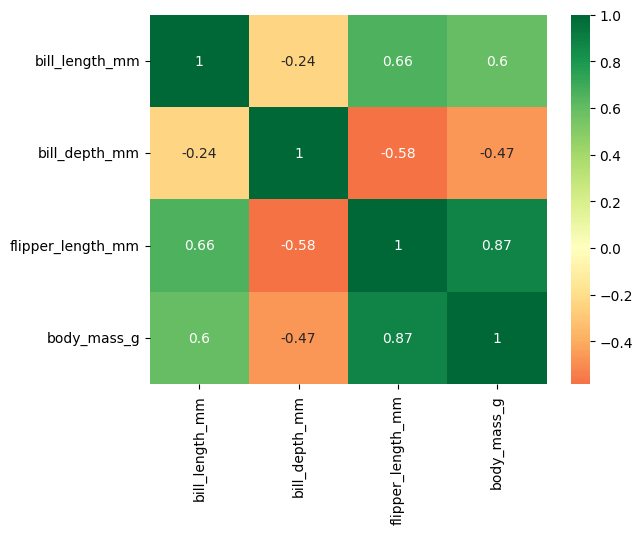

In [ ]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True, center=0, cmap='RdYlGn')

# ответ - flipper_length_mm и body_mass_g

Это фрагмент кода Python, который использует библиотеку Seaborn для создания тепловой карты корреляции. Позвольте мне объяснить по шагам:

1. `import seaborn as sns`

    Эта строка говорит Python'у импортировать библиотеку Seaborn (это популярная библиотека для визуализации данных, основанная на Matplotlib) и дает ей сокращенное имя `sns`, чтобы сделать следующие ссылки на нее короче и удобнее.

2. `sns.heatmap(df.corr(), annot=True, center=0, cmap='RdYlGn')`

    Это основная строка кода. Он создает тепловую карту используя функцию `heatmap()` из библиотеки Seaborn.

    - `df.corr()`: Этот метод возвращает корреляционную матрицу пандасовского DataFrame `df`. Корреляционная матрица представляет собой таблицу, которая показывает корреляционные коэффициенты между множеством переменных. Каждая ячейка в таблице показывает корреляцию между двумя переменными.

    - `annot=True`: Это аргумент Seaborn heatmap которое позволяет отображать числовые значения в ячейках тепловой карты.

    - `center=0`: Это означает, что цветовая гамма будет центрироваться вокруг нуля.

    - `cmap='RdYlGn'`: Это определяет цветовую гамму для тепловой карты. 'RdYlGn' означает, что используется цветовая гамма от красного (Rd) через желтый (Yl) до зеленого (Gn).

В итоге этот код создает тепловую карту, которая визуализирует корреляцию между различными переменными в DataFrame. Визуальные оттенки на тепловой карте помогают быстро улавливать паттерны и степень корреляции в данных.